In [28]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [29]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


In [31]:
from IPython.display import display, Markdown

markdown = """
À présent, on utilise ces variables retenues par notre nested LASSO pour déterminer l'effet de la distance sur les dépenses en logement.
En somme, on utilise la regression dans 3_reg_and_tests et on y ajoute nos covariables d'amenités.
"""
display(Markdown(markdown))


À présent, on utilise ces variables retenues par notre nested LASSO pour déterminer l'effet de la distance sur les dépenses en logement.
En somme, on utilise la regression dans 3_reg_and_tests et on y ajoute nos covariables d'amenités.


In [32]:
# on normalise la variable Numrooms 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_preprocess= scaler.fit_transform(total_dataset_clean[['Numrooms', 'Numroomsleep']])
data_preprocess = pd.DataFrame(data_preprocess, columns=['Numrooms','Numroomsleep'])

In [33]:
total_dataset_clean = total_dataset_clean.drop(['Numrooms','Numroomsleep'], axis=1)

In [34]:
X = pd.concat([total_dataset_clean, data_preprocess], axis=1)
tokeep2 = ['log_imputed_rent_uc','Kitchen',
 'own_status',
 'Computer',
 'Water_heater',
 'Utilrank',
 'Washing',
 'ColorTV',
 'Aqueduct',
 'Phone_service',
 'Naturalgas',
 'Numroomsleep',
 'territory',
 'Oven',
 'Blender',
 'gender',
 'Internet_service',
 'level_educ',
 'Sewage_system',
 'marital_status',
 'Numrooms',
 'Sanserv2',
 'Refrigerator',
 'Garbcollectfreq',
 'Stove',
 'age',
 'tvservice']

In [35]:
datareg = X[tokeep2].dropna()

In [36]:
datareg

,log_imputed_rent_uc,Kitchen,own_status,Computer,Water_heater,Utilrank,Washing,ColorTV,Aqueduct,Phone_service,...,level_educ,Sewage_system,marital_status,Numrooms,Sanserv2,Refrigerator,Garbcollectfreq,Stove,age,tvservice
0,13.245793,1.0,0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,...,5.0,1.0,3.0,0.272727,1.0,1.0,3.0,1.0,58.0,1.0
1,12.554873,1.0,0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,...,5.0,1.0,2.0,0.454545,1.0,1.0,3.0,1.0,42.0,1.0
2,13.112262,1.0,0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,...,5.0,1.0,1.0,0.272727,1.0,1.0,3.0,1.0,44.0,1.0
3,12.978522,1.0,0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,...,5.0,1.0,2.0,0.272727,1.0,1.0,2.0,2.0,49.0,1.0
4,12.965099,1.0,0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,...,6.0,1.0,4.0,0.272727,1.0,1.0,3.0,1.0,35.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,11.918391,1.0,1,1.0,2.0,9.0,1.0,1.0,1.0,2.0,...,5.0,2.0,2.0,0.181818,1.0,1.0,2.0,1.0,38.0,2.0
18134,12.206073,1.0,0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,3.0,1.0,4.0,0.090909,1.0,2.0,2.0,1.0,56.0,2.0
18135,11.879910,1.0,1,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,4.0,2.0,4.0,0.090909,1.0,1.0,2.0,1.0,40.0,2.0
18136,10.596635,1.0,1,2.0,2.0,9.0,2.0,1.0,2.0,2.0,...,3.0,2.0,2.0,0.272727,2.0,1.0,6.0,2.0,60.0,2.0


In [37]:
#tokeep2
from statsmodels.iolib.summary2 import summary_col

# regression
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory) + C(level_educ) + age + C(marital_status) + gender +  own_status + Numrooms + C(Utilrank) + C(Garbcollectfreq) + Computer + C(Kitchen) + Refrigerator + Sewage_system + tvservice + Washing + Blender + Internet_service + Water_heater + ColorTV+ Aqueduct + Phone_service +Naturalgas + Oven + Sanserv2 + Stove + Numroomsleep', data=datareg)
res = mod.fit()


# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"})
display(summary_table)

,OLS
Intercept,13.2201***
,(0.0666)
C(territory)[T.2],-0.0795***
,(0.0212)
C(territory)[T.3],-0.4347***
,(0.0273)
C(territory)[T.4],-0.1984***
,(0.0201)
C(territory)[T.5],-0.4156***
,(0.0262)


In [40]:
from IPython.display import display, Markdown

markdown = """
L'ajout de ce vecteur d'amenités améliore la regression : la surestimation de l'effet du territoire est reduite considérablement et semble à des niveau raisonnables connexes à France Stratégie (2023), ce qui montre la nécessité d'ajouter ce facteur de développement, les vecteurs d'amenités et ainsi corriger le potentiel biais de variables omises.

Le R2 est plus élevé ; Les coefficients des categories de territoire restent significatifs à 1%. on voit aussi que les incréments de la variable Utilrank sont plus raisonnables aussi (Utilrank n'est plus significatif à ==9 qui est de toute manière une catégorie où l'information était ambigue/manquante

Certains controles sont non significatifs, mais ce sont des controles d'amenites (colorTV, Stove, Blender -- et Phone_Service à un seuil de 10%)
    # on les garde quand meme : ils permettent comme indiqué par la regression LASSO, de reduire le MSE et donc de réduire l'overfitting
    # en terme d'interpretation, ca veut dire que posseder une de ces amenites ou pas d'a pas d'incidence sur les depenses en logement (vu que les coeffs ne sont pas significatifs, il n'y a pas de difference avec la categorie de reference), ce qui reste logique

Il ne reste plus qu'à faire les tests : 
"""
display(Markdown(markdown))


L'ajout de ce vecteur d'amenités améliore la regression : la surestimation de l'effet du territoire est reduite considérablement et semble à des niveau raisonnables connexes à France Stratégie (2023), ce qui montre la nécessité d'ajouter ce facteur de développement, les vecteurs d'amenités et ainsi corriger le potentiel biais de variables omises.

Le R2 est plus élevé ; Les coefficients des categories de territoire restent significatifs à 1%. on voit aussi que les incréments de la variable Utilrank sont plus raisonnables aussi (Utilrank n'est plus significatif à ==9 qui est de toute manière une catégorie où l'information était ambigue/manquante

Certains controles sont non significatifs, mais ce sont des controles d'amenites (colorTV, Stove, Blender -- et Phone_Service à un seuil de 10%)
    # on les garde quand meme : ils permettent comme indiqué par la regression LASSO, de reduire le MSE et donc de réduire l'overfitting
    # en terme d'interpretation, ca veut dire que posseder une de ces amenites ou pas d'a pas d'incidence sur les depenses en logement (vu que les coeffs ne sont pas significatifs, il n'y a pas de difference avec la categorie de reference), ce qui reste logique

Il ne reste plus qu'à faire les tests : 


In [41]:
#multicollinearite

X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("Pas de multicollinéarité (pas grave pour C(Garbcollectfreq)[T.3.0] car vif_moyen(Garbcollectfreq) <10")
print(vif)

#tout est bon, pas grave pour Garbcollectfreq car vif_moyen(Garbcollectfreq) <10

Pas de multicollinéarité (pas grave pour C(Garbcollectfreq)[T.3.0] car vif_moyen(Garbcollectfreq) <10
                     Variable         VIF
0                   Intercept  400.600140
1           C(territory)[T.2]    3.513012
2           C(territory)[T.3]    1.896966
3           C(territory)[T.4]    4.583025
4           C(territory)[T.5]    2.288634
5           C(territory)[T.6]    5.176889
6           C(territory)[T.7]    3.028129
7           C(territory)[T.8]    5.688433
8           C(territory)[T.9]    1.992340
9          C(territory)[T.10]    4.889732
10         C(territory)[T.11]    2.275604
11       C(level_educ)[T.3.0]    5.665196
12       C(level_educ)[T.4.0]    3.788442
13       C(level_educ)[T.5.0]    6.647560
14       C(level_educ)[T.6.0]    6.948538
15   C(marital_status)[T.2.0]    2.646686
16   C(marital_status)[T.3.0]    2.603479
17   C(marital_status)[T.4.0]    2.198804
18   C(marital_status)[T.5.0]    1.999149
19         C(Utilrank)[T.2.0]    1.617854
20         C(Uti

In [42]:
#voir si on corrige des standard errors

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

White Test for Heteroskedasticity:
Test Statistic: 2365.264464229593
P-Value: 2.4136461361027837e-61
F-Statistic: 1.909835166591582
F-Test P-Value: 3.1593383150337713e-69


In [57]:
from IPython.display import display, Markdown

markdown = """
Ho : Common variance 

On ne peut pas rejeter Ho, donc il y a de l'hétéroskédasticité. On utilise les White robust standard errors : 
"""
display(Markdown(markdown))


Ho : Common variance 

On ne peut pas rejeter Ho, donc il y a de l'hétéroskédasticité. On utilise les White robust standard errors : 


In [58]:
results = mod.fit(cov_type='HC0')
summary_table = summary_col([results], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,1.4236***
,(0.0598)
age,0.0050***
,(0.0003)
gender,-0.0394***
,(0.0077)
own_status,0.0372***
,(0.0074)
Intercept,13.2201***
,(0.0819)


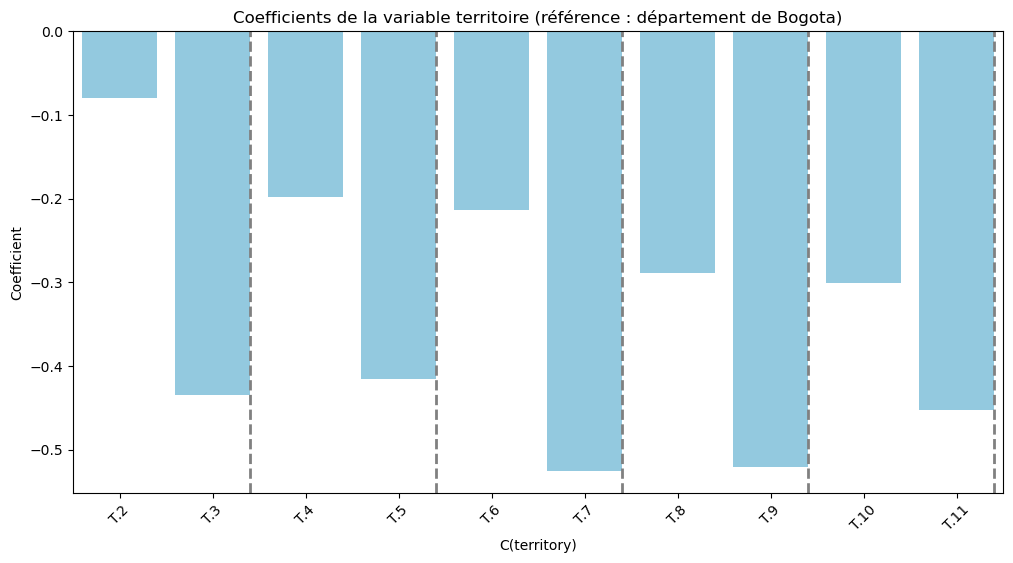

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and territory categories from the summary table
coefficients = results.params.loc['C(territory)[T.2]': 'C(territory)[T.11]']
territories = [f'T.{i}' for i in range(2, 12)]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=territories, y=coefficients, color='skyblue')

# Add a separating line after every odd index
for i, bar in enumerate(ax.patches):
    if i % 2 != 0:
        ax.axvline(x=bar.get_x() + bar.get_width(), color='gray', linestyle='--', linewidth=2.0)

plt.title('Coefficients de la variable territoire (référence : département de Bogota)')
plt.xlabel('C(territory)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

In [62]:

markdown = """
Les pointillés délimitent les aires urbaines (à l'intérieur, il y a la couche centre (T.pair) et la couche périurbaine (T.impair)). Le coût de la vie est partout plus faible qu'à Bogota (qui est la catégorie de référence).

On observe bien l'hypothèse monocentrique : l'éloignement du centre urbain diminue les dépenses en logement, par arbitrage avec le transport. Aussi, plus le centre urbain est dense et plus la demande et le coût du logement est grand : c'est un effet d'agglomération que l'on observe entre les aires urbaines. En effet, la baisse du coût de logement dans les grandes capitales (T.2) est moins forte que dans un centre urbain plus petit (T.4), et ainsi de suite. 
Le pays semble adopter une structure monocentrique. Les territoires dans la catégorie T.11 sont doublement 'pénalisés' : l'aire urbaine étant moins dense que celles de T.7 et T.9, habiter en zone périurbaine T.11 reste en moyenne plus cher que de vivre dans les zones périurbaines T.7 et T.9 qui bénéficient d'un plus grand dynamisme.  

"""
display(Markdown(markdown))

#les coefficients sont plus raisonnables : on a corrige la surestimation au depart en selectionnant un vecteur d'amenites dans le notebook 4_lasso


Les pointillés délimitent les aires urbaines (à l'intérieur, il y a la couche centre (T.pair) et la couche périurbaine (T.impair)). Le coût de la vie est partout plus faible qu'à Bogota (qui est la catégorie de référence).

On observe bien l'hypothèse monocentrique : l'éloignement du centre urbain diminue les dépenses en logement, par arbitrage avec le transport. Aussi, plus le centre urbain est dense et plus la demande et le coût du logement est grand : c'est un effet d'agglomération que l'on observe entre les aires urbaines. En effet, la baisse du coût de logement dans les grandes capitales (T.2) est moins forte que dans un centre urbain plus petit (T.4), et ainsi de suite. 
Le pays semble adopter une structure monocentrique. Les territoires dans la catégorie T.11 sont doublement 'pénalisés' : l'aire urbaine étant moins dense que celles de T.7 et T.9, habiter en zone périurbaine T.11 reste en moyenne plus cher que de vivre dans les zones périurbaines T.7 et T.9 qui bénéficient d'un plus grand dynamisme.  

